# **Decision Tree Classification on Cardiovascular disease dataset**

In [71]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Dataset Link : https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [72]:
#Loading the data
data = pd.read_csv('/content/cardio_train.csv',delimiter=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [73]:
# import necessary libraries from Scikit
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


Storing the cardio (target) in another variable and Dropping the cardio column from the dataframe

In [74]:
y=data["cardio"]
data.drop(['cardio'],axis = 1, inplace = True)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0


Splitting the dataset into train and test sets in the ratio of 70:30 respectively

In [75]:
X_train, X_test, Y_train,  Y_test = train_test_split(data.values, y.values, test_size =0.3, random_state=17)
print("Size of training set :" + str(len(X_train))+ " " + "Size of testing set :"+ str(len(X_test)))

Size of training set :49000 Size of testing set :21000


Training the Decision Tree Classifier with max_depth(parameter) = 3

In [76]:
dectr = DecisionTreeClassifier(max_depth= 3, random_state=17)
dectr.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

Predicting the trained Decision Tree Classifier on test set

In [77]:
Y_pred = dectr.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of Decision Tree Classifier is", str(acc))

Accuracy of Decision Tree Classifier is 0.7212857142857143


Visualizing the Decision Tree

[Text(0.5, 0.875, 'x[5] <= 129.5\ngini = 0.5\nsamples = 49000\nvalue = [24531, 24469]'),
 Text(0.25, 0.625, 'x[1] <= 19931.5\ngini = 0.433\nsamples = 28925\nvalue = [19758, 9167]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[7] <= 2.5\ngini = 0.359\nsamples = 17715\nvalue = [13555, 4160]'),
 Text(0.0625, 0.125, 'gini = 0.343\nsamples = 16968\nvalue = [13235, 3733]'),
 Text(0.1875, 0.125, 'gini = 0.49\nsamples = 747\nvalue = [320, 427]'),
 Text(0.375, 0.375, 'x[7] <= 2.5\ngini = 0.494\nsamples = 11210\nvalue = [6203, 5007]'),
 Text(0.3125, 0.125, 'gini = 0.486\nsamples = 10043\nvalue = [5865, 4178]'),
 Text(0.4375, 0.125, 'gini = 0.411\nsamples = 1167\nvalue = [338.0, 829.0]'),
 Text(0.75, 0.625, 'x[5] <= 138.5\ngini = 0.362\nsamples = 20075\nvalue = [4773, 15302]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 2.5\ngini = 0.478\nsamples = 6522\nvalue = [2580, 3942]'),
 Text(0.5625, 0.125, 'gini = 0.493\nsamples = 5258\nvalue = [2325.0, 2933.0]'),
 Text(0.6875, 

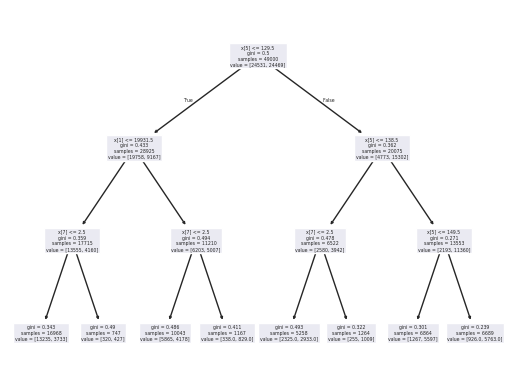

In [78]:
from sklearn import tree
tree.plot_tree(dectr)

Other way of visualing the decision tree

In [ ]:
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image

def tree_2_img(dec, featr,file_name):
    dec_grp = export_graphviz(dec, feature_names=featr, filled=True, out_file=None)
    grp = pydotplus.graph_from_dot_data(dec_grp)
    grp.write_png(file_name)

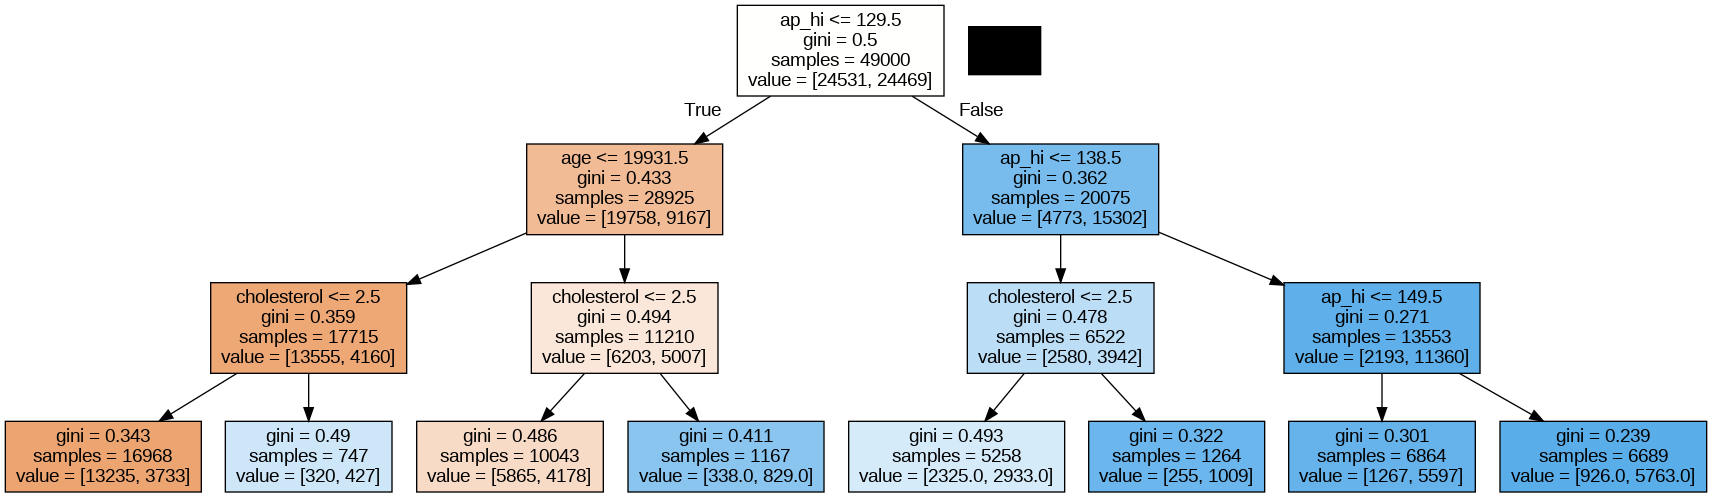

In [ ]:
file_n='cardio_graph.png'
tree_2_img(dectr,featr = data.columns,file_name =file_n )
Image(file_n)

*   Performance of the Decision Tree depends on the parameter values
*   Training and testing over every parameter value is a time-consuming task and not optimal
*   Hence, we opt for cross-validation technique to find the optimal parameters

In [ ]:
dec_params = {'max_depth': range(1,10)}
dectr_cv = GridSearchCV(dectr,dec_params,cv=4,verbose=True)
dectr_cv.fit(X_train,Y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=17),
             param_grid={'max_depth': range(1, 10)}, verbose=True)

In [ ]:
dectr_cv.best_params_

{'max_depth': 5}

In [ ]:
dectr_cv.best_score_

0.7307346938775511

In [ ]:
Y_pred_cv = dectr_cv.predict(X_test)
print("Accuracy of Cross Validated Decision Tree is ", str(accuracy_score(Y_test,Y_pred_cv)))

Accuracy of Cross Validated Decision Tree is  0.7302857142857143


Visualizing the Decision Tree Classifier with best parameters chosen by cross-validation

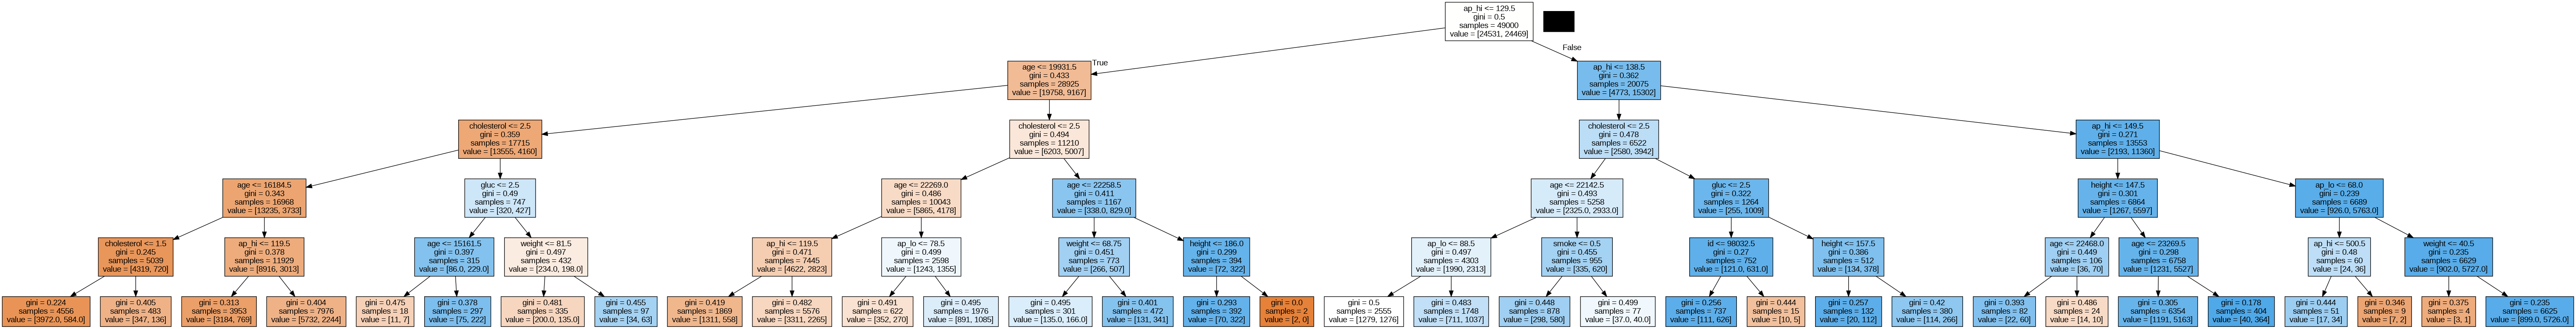

In [ ]:
file_n='cardio_graph_cv.png'
tree_2_img(dectr_cv.best_estimator_,featr = data.columns,file_name =file_n )
Image(file_n)